In [ ]:
colab = True

In [ ]:
import os

In [ ]:
if colab:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if colab:
  base_dir = '/content/drive/MyDrive/green_areas_detection'
  %cp -R "/content/drive/MyDrive/green_areas_detection/trees_detection/yolov7" "./"
  %cp -R "/content/drive/MyDrive/green_areas_detection/trees_detection/weigths" "./"
else:
  base_dir = ''

In [ ]:
# IMPORTANT : from now on, we enter inside the `yolov7` folder
%cd yolov7

/content/yolov7


# LOAD AND PREPARE DATASET
We use $3$ images for the training : `19K35`, `19K38`, `18K11`.

We use $1$ image for the validation : `19K53`.  

We use $1$ image for the validation : `19K59`.  

We use only the 3 RGB channels.

In [ ]:
from trees_detection_utils.dataset_handler import crop_images_and_bbs, save_bbs_as_txt, crop_images

In [ ]:
CROP_SIZE = 640
STEP = 320

## Training images
We create the folder `train`, with two subfolders.
1. `train\images`, containing the crops.
2. `train\labels`, containing the info about the bounding boxes of each crop. For each crop, a corresponding `.txt` file is present, containing the bounding boxes enclosed in that crop.

In [ ]:
dataset_folder = os.path.join(base_dir, 'dataset')

train_image_names_list = ['18K11', '19K38', '19K35']

train_image_paths_list = [os.path.join(dataset_folder, img_name, f'{img_name}.tif') for img_name in train_image_names_list]

train_bbs_shp_paths_list = [os.path.join(dataset_folder, img_name, 'trees_shp', f'{img_name}_trees.shp') for img_name in train_image_names_list]

In [ ]:
crop_images_and_bbs(train_image_paths_list, train_bbs_shp_paths_list, crop_size=CROP_SIZE, step=STEP, folder_path='./train', infrared=False)

Processing image 18K11.tif


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (98211778 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 911/911 [00:09<00:00, 98.56it/s]


BBs frequencies assignment {0: 0.01, 1: 0.02, 2: 0.24, 3: 0.01, 4: 0.69, 6: 0.04, 9: 0.0}

Processing image 19K38.tif


100%|██████████| 875/875 [00:08<00:00, 98.17it/s]


BBs frequencies assignment {0: 0.01, 1: 0.02, 2: 0.23, 3: 0.0, 4: 0.7, 6: 0.03, 9: 0.0}

Processing image 19K35.tif


100%|██████████| 655/655 [00:06<00:00, 96.60it/s]

BBs frequencies assignment {0: 0.02, 1: 0.04, 2: 0.28, 3: 0.01, 4: 0.61, 6: 0.05, 9: 0.0}



## Validation images
We create the folder `val`, with two subfolders.
1. `val\images`, containing the crops.
2. `val\labels`, containing the info about the bounding boxes of each crop. For each crop, a corresponding `.txt` file is present, containing the bounding boxes enclosed in that crop.

In [ ]:
dataset_folder = os.path.join(base_dir, 'dataset')

val_image_names_list = ['19K53']

val_image_paths_list = [os.path.join(dataset_folder, img_name, f'{img_name}.tif') for img_name in val_image_names_list]

val_bbs_shp_paths_list = [os.path.join(dataset_folder, img_name, 'trees_shp', f'{img_name}_trees.shp') for img_name in val_image_names_list]

In [ ]:
crop_images_and_bbs(val_image_paths_list, val_bbs_shp_paths_list, crop_size=CROP_SIZE, step=STEP, folder_path='./val', infrared=False)

Processing image 19K53.tif


100%|██████████| 855/855 [00:09<00:00, 94.95it/s]

BBs frequencies assignment {0: 0.01, 1: 0.04, 2: 0.28, 3: 0.01, 4: 0.64, 6: 0.03, 9: 0.0}



In [ ]:
save_bbs_as_txt(val_bbs_shp_paths_list[0], val_image_paths_list[0], output_file_path=None)

## Test images
We create the folder `test`, with two subfolders.
1. `test\images`, containing the crops.
2. `test\labels`, containing the info about the bounding boxes of each crop. For each crop, a corresponding `.txt` file is present, containing the bounding boxes enclosed in that crop.

In [ ]:
dataset_folder = os.path.join(base_dir, 'dataset')

test_image_names_list = ['19K59']

test_image_paths_list = [os.path.join(dataset_folder, img_name, f'{img_name}.tif') for img_name in test_image_names_list]

test_bbs_shp_paths_list = [os.path.join(dataset_folder, img_name, 'trees_shp', f'{img_name}_trees.shp') for img_name in test_image_names_list]

In [ ]:
crop_images_and_bbs(test_image_paths_list, test_bbs_shp_paths_list, crop_size=CROP_SIZE, step=STEP, folder_path='./test', infrared=False)

Processing image 19K59.tif


100%|██████████| 944/944 [00:09<00:00, 98.27it/s]

BBs frequencies assignment {0: 0.01, 1: 0.03, 2: 0.24, 3: 0.01, 4: 0.65, 6: 0.05, 9: 0.0}



In [ ]:
save_bbs_as_txt(test_bbs_shp_paths_list[0], test_image_paths_list[0], output_file_path=None)

# YOLO MODEL
https://github.com/WongKinYiu/yolov7

In [ ]:
# Just to check GPU
!nvidia-smi

Mon Oct  9 08:22:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd yolov7

[Errno 2] No such file or directory: 'yolov7'
/content/yolov7


In [ ]:
!pip install -r requirements.txt ;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


# Training
Train the model on the $3$ train images, with $1$ val image.

*(The starting point of this training is the fine-tuning on the pre-trained `yolov7_training.pt` weigths).*


In [ ]:
# System RAM : ~9GB
# GPU RAM : ~10GB
!python train.py --rgb_only --epochs 25 --workers 8 --device 0 --batch-size 8 --data 'data.yaml' --img 640 640 --cfg 'cfg/training/yolov7-tree.yaml' --weights 'yolov7_training.pt'

2023-10-08 15:37:24.486583: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-08 15:37:24.541547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-08 15:37:25.453444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2023-10-8 torch 2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40513.5625MB)

Namespace(rgb_only=True, weights='yolov7_training.pt', cfg='cfg/training/yolov7-tree.yaml', data='data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=25, batch_size=8, i

*Remark : the printed scores (MAP; precision, recall, ...) are computed on the validation image. But pay attention that they are computed on the validation crops, not on whole full val image. In addition, pay attention that these scores are computed using particular confidence and iou_nms thresholds. So, you don't have to much high consideration on these scores.*

# Inference and evaluation on the full validation image

In [ ]:
%cd yolov7

[Errno 2] No such file or directory: 'yolov7'
/content/yolov7


In [ ]:
from trees_detection_utils.inference import predict_on_img

### Inference
Perform inference on the whole validation image. The result of this is a single `.txt` file, containing all the bounding boxes on the whole validation image.

For now, we perform this inference by setting `conf_thres=0.25` and `iou_nms_thres=0.45`. These two very important inference parameters will be later tuned.

In [ ]:
path_to_weigths = '../weigths/best_rgb_train.pt'
image_path = os.path.join(base_dir, 'dataset/19K53/19K53.tif')
predict_on_img(path_to_weigths, image_path, output_bbs_path='./boxes.txt', crop_size=CROP_SIZE, step=STEP,
               conf_thres=0.25, iou_nms_thres=0.45, intersect_thres=0.75, verbose=True,
               save_fig_pred_bbs=True, infrared=False)

CROP IMAGE ...


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (98211778 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 945/945 [00:08<00:00, 109.71it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:49<00:00, 18.92it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 866/866 [00:00<00:00, 17755.19it/s]


Number of bbs after joining:, 14814
Number of bbs after NMS:, 4491
Number of bbs after enclosed bbs filtering:, 3910
FINISH UNIFY CROPS

SAVING IMAGE ...


100%|██████████| 3910/3910 [00:00<00:00, 52991.92it/s]


Image saved
FINISH SAVING IMAGE


### Evaluation
Evaluate these predicted bounding boxes w.r.t. the ground truth ones, still on the whole val image.

In [ ]:
from trees_detection_utils.evaluation import visualize_errors_and_missings, evaluate_predicted_boxes

In [ ]:
# Save a figure containing both the ground truths and predictes boxes, both with the 
# missings and the errors
image_path = os.path.join(base_dir, 'dataset/19K53/19K53_RGB.tif')
gt_boxes_txt_path = os.path.join(base_dir, 'dataset/19K53/19K53_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
visualize_errors_and_missings(image_path, gt_boxes_txt_path, pred_boxes_txt_path,
                              iou_eval_thres=0.4, show=False)

100%|██████████| 4785/4785 [00:00<00:00, 73749.22it/s]


Figure saved


3910it [00:37, 105.12it/s]


mAP: 0.58
Last precision: 0.76
Last recall: 0.62
Last f1: 0.68
Best f1: 0.68; index: 3703


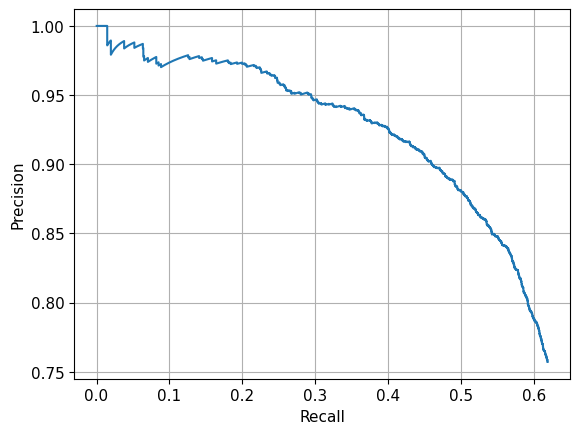

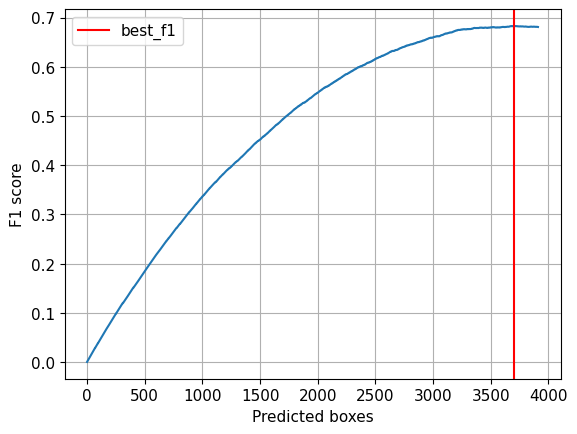

In [ ]:
%matplotlib inline
gt_boxes_txt_path = os.path.join(base_dir,'dataset/19K53/19K53_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
map_score, last_f1, last_prec, last_rec = evaluate_predicted_boxes(gt_boxes_txt_path, pred_boxes_txt_path, iou_eval_thres=0.4, plot_prec_rec=True, plot_f1=True, verbose=True)

Validation scores. 
- F1 score : $0.68$.
- Precision : $0.76$.
- Recall : $0.62$.
- MAP : $0.58$.

# Hyperparameters tuning
Let's now tune the two inference parameters `conf_thres` and `iou_nms_thrss` on the validation image.

Exaustive grid search among all possible couples of values.

This tuning is done w.r.t. the f1 score. This is the measure to monitor.

In [ ]:
from trees_detection_utils.evaluation import inference_parameters_tuning

[(0.1, 0.3), (0.1, 0.45), (0.1, 0.6), (0.15, 0.3), (0.15, 0.45), (0.15, 0.6), (0.2, 0.3), (0.2, 0.45), (0.2, 0.6), (0.25, 0.3), (0.25, 0.45), (0.25, 0.6), (0.3, 0.3), (0.3, 0.45), (0.3, 0.6), (0.35, 0.3), (0.35, 0.45), (0.35, 0.6), (0.4, 0.3), (0.4, 0.45), (0.4, 0.6), (0.45, 0.3), (0.45, 0.45), (0.45, 0.6), (0.5, 0.3), (0.5, 0.45), (0.5, 0.6)]
START HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 107.34it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:53<00:00, 17.81it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 904/904 [00:00<00:00, 15661.44it/s]


Number of bbs after joining:, 20618
Number of bbs after NMS:, 6102
Number of bbs after enclosed bbs filtering:, 5486
FINISH UNIFY CROPS



5486it [00:51, 105.55it/s]


mAP: 0.62
Last precision: 0.59
Last recall: 0.68
Last f1: 0.63
Best f1: 0.68; index: 3681
mAP:0.6160751537440248 f1:0.633433940220037 prec:0.592963908129785 rec:0.6798328108672936
END HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 110.93it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:53<00:00, 17.61it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 904/904 [00:00<00:00, 14820.46it/s]


Number of bbs after joining:, 21699
Number of bbs after NMS:, 6872
Number of bbs after enclosed bbs filtering:, 5505
FINISH UNIFY CROPS



5505it [00:52, 105.83it/s]


mAP: 0.62
Last precision: 0.59
Last recall: 0.68
Last f1: 0.63
Best f1: 0.68; index: 3579
mAP:0.6163612814279634 f1:0.6324586977648201 prec:0.5910990009082652 rec:0.6800417972831766
END HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 109.04it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:54<00:00, 17.42it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 904/904 [00:00<00:00, 13713.57it/s]


Number of bbs after joining:, 24149
Number of bbs after NMS:, 8405
Number of bbs after enclosed bbs filtering:, 5422
FINISH UNIFY CROPS



5422it [00:51, 105.37it/s]


mAP: 0.60
Last precision: 0.59
Last recall: 0.66
Last f1: 0.62
Best f1: 0.66; index: 3362
mAP:0.5974372735840883 f1:0.6217301851670421 prec:0.5852084101807451 rec:0.6631138975966562
END HYPERPARAMETERS conf_thres:0.1 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 108.74it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:51<00:00, 18.28it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 890/890 [00:00<00:00, 16456.01it/s]


Number of bbs after joining:, 17896
Number of bbs after NMS:, 5195
Number of bbs after enclosed bbs filtering:, 4773
FINISH UNIFY CROPS



4773it [00:45, 105.58it/s]


mAP: 0.60
Last precision: 0.66
Last recall: 0.66
Last f1: 0.66
Best f1: 0.68; index: 3689
mAP:0.6029532589520729 f1:0.6595522075748065 prec:0.6603813115441023 rec:0.6587251828631139
END HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 107.96it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:08<00:00, 110.12it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:52<00:00, 17.98it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 890/890 [00:00<00:00, 15609.68it/s]


Number of bbs after joining:, 19602
Number of bbs after NMS:, 6625
Number of bbs after enclosed bbs filtering:, 4721
FINISH UNIFY CROPS



4721it [00:44, 106.48it/s]


mAP: 0.59
Last precision: 0.66
Last recall: 0.65
Last f1: 0.65
Best f1: 0.67; index: 3627
mAP:0.5934394188852028 f1:0.6532716179255207 prec:0.6576996399067994 rec:0.6489028213166145
END HYPERPARAMETERS conf_thres:0.15 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 107.97it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:49<00:00, 18.93it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 880/880 [00:00<00:00, 16452.94it/s]


Number of bbs after joining:, 16157
Number of bbs after NMS:, 4620
Number of bbs after enclosed bbs filtering:, 4295
FINISH UNIFY CROPS



4295it [00:40, 105.92it/s]


mAP: 0.59
Last precision: 0.71
Last recall: 0.64
Last f1: 0.67
Best f1: 0.68; index: 3697
mAP:0.5881742691799247 f1:0.6718061674008811 prec:0.710128055878929 rec:0.6374085684430512
END HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 109.90it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:50<00:00, 18.82it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 880/880 [00:00<00:00, 17190.33it/s]


Number of bbs after joining:, 16451
Number of bbs after NMS:, 5009
Number of bbs after enclosed bbs filtering:, 4300
FINISH UNIFY CROPS



4300it [00:40, 106.34it/s]


mAP: 0.59
Last precision: 0.71
Last recall: 0.64
Last f1: 0.67
Best f1: 0.68; index: 3686
mAP:0.5909881882217747 f1:0.6742982938910292 prec:0.7123255813953489 rec:0.6401253918495298
END HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 109.07it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:51<00:00, 18.36it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 880/880 [00:00<00:00, 15085.45it/s]


Number of bbs after joining:, 17073
Number of bbs after NMS:, 5653
Number of bbs after enclosed bbs filtering:, 4248
FINISH UNIFY CROPS



4248it [00:42, 100.55it/s]


mAP: 0.59
Last precision: 0.71
Last recall: 0.63
Last f1: 0.67
Best f1: 0.68; index: 3728
mAP:0.5850641211047751 f1:0.6713162847337539 prec:0.7137476459510358 rec:0.6336468129571577
END HYPERPARAMETERS conf_thres:0.2 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:09<00:00, 102.64it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:50<00:00, 18.88it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 866/866 [00:00<00:00, 17731.35it/s]


Number of bbs after joining:, 14640
Number of bbs after NMS:, 4159
Number of bbs after enclosed bbs filtering:, 3904
FINISH UNIFY CROPS



3904it [00:37, 102.78it/s]


mAP: 0.57
Last precision: 0.76
Last recall: 0.62
Last f1: 0.68
Best f1: 0.68; index: 3703
mAP:0.5736364135402665 f1:0.6799401542179768 prec:0.7566598360655737 rec:0.6173458725182863
END HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 109.25it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:53<00:00, 17.82it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 866/866 [00:00<00:00, 15403.69it/s]


Number of bbs after joining:, 14814
Number of bbs after NMS:, 4491
Number of bbs after enclosed bbs filtering:, 3910
FINISH UNIFY CROPS



3910it [00:42, 92.73it/s]


mAP: 0.58
Last precision: 0.76
Last recall: 0.62
Last f1: 0.68
Best f1: 0.68; index: 3703
mAP:0.5752960128927714 f1:0.6808510638297872 prec:0.7570332480818415 rec:0.6185997910135841
END HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:09<00:00, 100.94it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:54<00:00, 17.40it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 866/866 [00:00<00:00, 14961.76it/s]


Number of bbs after joining:, 15163
Number of bbs after NMS:, 4980
Number of bbs after enclosed bbs filtering:, 3874
FINISH UNIFY CROPS



3874it [00:38, 100.38it/s]


mAP: 0.57
Last precision: 0.76
Last recall: 0.61
Last f1: 0.68
Best f1: 0.68; index: 3752
mAP:0.5716742989108633 f1:0.6790622473726758 prec:0.7589055240061952 rec:0.6144200626959248
END HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:09<00:00, 102.14it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:52<00:00, 18.17it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 853/853 [00:00<00:00, 17361.86it/s]


Number of bbs after joining:, 13392
Number of bbs after NMS:, 3791
Number of bbs after enclosed bbs filtering:, 3581
FINISH UNIFY CROPS



3581it [00:35, 101.98it/s]


mAP: 0.56
Last precision: 0.79
Last recall: 0.59
Last f1: 0.68
Best f1: 0.68; index: 3523
mAP:0.5553304967496653 f1:0.6791776237150371 prec:0.7933538117844178 rec:0.5937304075235109
END HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 108.48it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:48<00:00, 19.38it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 853/853 [00:00<00:00, 18331.88it/s]


Number of bbs after joining:, 13493
Number of bbs after NMS:, 4066
Number of bbs after enclosed bbs filtering:, 3590
FINISH UNIFY CROPS



3590it [00:34, 104.69it/s]


mAP: 0.56
Last precision: 0.79
Last recall: 0.59
Last f1: 0.68
Best f1: 0.68; index: 3532
mAP:0.5568301497248572 f1:0.6798805970149253 prec:0.7930362116991644 rec:0.5949843260188088
END HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 107.74it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:49<00:00, 19.26it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 853/853 [00:00<00:00, 17058.63it/s]


Number of bbs after joining:, 13688
Number of bbs after NMS:, 4468
Number of bbs after enclosed bbs filtering:, 3563
FINISH UNIFY CROPS



3563it [00:33, 105.10it/s]


mAP: 0.55
Last precision: 0.79
Last recall: 0.59
Last f1: 0.68
Best f1: 0.68; index: 3549
mAP:0.553962309087579 f1:0.6780067081935793 prec:0.7942744877911873 rec:0.5914315569487983
END HYPERPARAMETERS conf_thres:0.3 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 108.30it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:47<00:00, 19.76it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 842/842 [00:00<00:00, 18952.68it/s]


Number of bbs after joining:, 12335
Number of bbs after NMS:, 3476
Number of bbs after enclosed bbs filtering:, 3301
FINISH UNIFY CROPS



3301it [00:31, 104.71it/s]


mAP: 0.54
Last precision: 0.83
Last recall: 0.57
Last f1: 0.68
Best f1: 0.68; index: 3286
mAP:0.5366693205372374 f1:0.6757358397229779 prec:0.8276279915177219 rec:0.5709508881922675
END HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 108.51it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:48<00:00, 19.34it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 842/842 [00:00<00:00, 19041.07it/s]


Number of bbs after joining:, 12394
Number of bbs after NMS:, 3702
Number of bbs after enclosed bbs filtering:, 3312
FINISH UNIFY CROPS



3312it [00:31, 105.44it/s]


mAP: 0.54
Last precision: 0.83
Last recall: 0.57
Last f1: 0.68
Best f1: 0.68; index: 3288
mAP:0.5386946867685068 f1:0.6767938742744227 prec:0.8272946859903382 rec:0.5726227795193313
END HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 107.55it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:48<00:00, 19.36it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 842/842 [00:00<00:00, 18722.49it/s]


Number of bbs after joining:, 12488
Number of bbs after NMS:, 4041
Number of bbs after enclosed bbs filtering:, 3290
FINISH UNIFY CROPS



3290it [00:31, 104.67it/s]


mAP: 0.54
Last precision: 0.83
Last recall: 0.57
Last f1: 0.68
Best f1: 0.68; index: 3259
mAP:0.5382789091783778 f1:0.6771517027863777 prec:0.8310030395136778 rec:0.5713688610240334
END HYPERPARAMETERS conf_thres:0.35 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 108.77it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:46<00:00, 20.13it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 830/830 [00:00<00:00, 4102.05it/s]


Number of bbs after joining:, 11246
Number of bbs after NMS:, 3167
Number of bbs after enclosed bbs filtering:, 3036
FINISH UNIFY CROPS



3036it [00:29, 104.35it/s]


mAP: 0.51
Last precision: 0.85
Last recall: 0.54
Last f1: 0.66
Best f1: 0.66; index: 3034
mAP:0.5116099264411089 f1:0.6620636747219025 prec:0.8527667984189723 rec:0.5410658307210031
END HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 108.80it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:47<00:00, 20.01it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 830/830 [00:00<00:00, 19010.26it/s]


Number of bbs after joining:, 11286
Number of bbs after NMS:, 3345
Number of bbs after enclosed bbs filtering:, 3043
FINISH UNIFY CROPS



3043it [00:29, 103.71it/s]


mAP: 0.51
Last precision: 0.85
Last recall: 0.54
Last f1: 0.66
Best f1: 0.66; index: 3041
mAP:0.5128101653401984 f1:0.6624936126724579 prec:0.8521196187972395 rec:0.541901776384535
END HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 108.27it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:47<00:00, 19.78it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 830/830 [00:00<00:00, 3878.96it/s]


Number of bbs after joining:, 11335
Number of bbs after NMS:, 3640
Number of bbs after enclosed bbs filtering:, 3034
FINISH UNIFY CROPS



3034it [00:29, 104.37it/s]


mAP: 0.51
Last precision: 0.85
Last recall: 0.54
Last f1: 0.66
Best f1: 0.66; index: 3032
mAP:0.5127526777333419 f1:0.6624888093106535 prec:0.8536585365853658 rec:0.5412748171368861
END HYPERPARAMETERS conf_thres:0.4 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 108.71it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:47<00:00, 19.87it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 825/825 [00:00<00:00, 20958.82it/s]


Number of bbs after joining:, 10181
Number of bbs after NMS:, 2889
Number of bbs after enclosed bbs filtering:, 2793
FINISH UNIFY CROPS



2793it [00:26, 105.94it/s]


mAP: 0.48
Last precision: 0.87
Last recall: 0.51
Last f1: 0.64
Best f1: 0.64; index: 2792
mAP:0.4842692735842 f1:0.6434415413037742 prec:0.8728965270318654 rec:0.5095088819226751
END HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 109.52it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:48<00:00, 19.68it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 825/825 [00:00<00:00, 3655.11it/s]


Number of bbs after joining:, 10199
Number of bbs after NMS:, 3027
Number of bbs after enclosed bbs filtering:, 2802
FINISH UNIFY CROPS



2802it [00:26, 103.82it/s]


mAP: 0.49
Last precision: 0.87
Last recall: 0.51
Last f1: 0.64
Best f1: 0.64; index: 2799
mAP:0.4860613224577269 f1:0.6445235270858046 prec:0.8725910064239829 rec:0.5109717868338558
END HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 108.31it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:46<00:00, 20.18it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 825/825 [00:00<00:00, 20564.83it/s]


Number of bbs after joining:, 10208
Number of bbs after NMS:, 3278
Number of bbs after enclosed bbs filtering:, 2799
FINISH UNIFY CROPS



2799it [00:27, 103.35it/s]


mAP: 0.49
Last precision: 0.87
Last recall: 0.51
Last f1: 0.64
Best f1: 0.64; index: 2798
mAP:0.48655226909830507 f1:0.6447784810126582 prec:0.8735262593783494 rec:0.5109717868338558
END HYPERPARAMETERS conf_thres:0.45 iou_nms_thres:0.6

START HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.3
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 107.59it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:46<00:00, 20.29it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 817/817 [00:00<00:00, 20787.31it/s]


Number of bbs after joining:, 9018
Number of bbs after NMS:, 2557
Number of bbs after enclosed bbs filtering:, 2492
FINISH UNIFY CROPS



2492it [00:24, 103.46it/s]


mAP: 0.45
Last precision: 0.90
Last recall: 0.47
Last f1: 0.61
Best f1: 0.61; index: 2491
mAP:0.4460744836635182 f1:0.6131647657001511 prec:0.8952648475120385 rec:0.46624869383490075
END HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.3

START HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.45
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 107.04it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:46<00:00, 20.38it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 817/817 [00:00<00:00, 21378.42it/s]


Number of bbs after joining:, 9026
Number of bbs after NMS:, 2660
Number of bbs after enclosed bbs filtering:, 2495
FINISH UNIFY CROPS



2495it [00:24, 103.78it/s]


mAP: 0.45
Last precision: 0.90
Last recall: 0.47
Last f1: 0.61
Best f1: 0.61; index: 2494
mAP:0.4472173526243045 f1:0.6140109890109889 prec:0.8957915831663327 rec:0.4670846394984326
END HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.45

START HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.6
CROP IMAGE ...


100%|██████████| 945/945 [00:08<00:00, 109.12it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [00:46<00:00, 20.39it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 817/817 [00:00<00:00, 21795.73it/s]


Number of bbs after joining:, 9029
Number of bbs after NMS:, 2866
Number of bbs after enclosed bbs filtering:, 2495
FINISH UNIFY CROPS



2495it [00:24, 101.98it/s]


mAP: 0.45
Last precision: 0.89
Last recall: 0.47
Last f1: 0.61
Best f1: 0.61; index: 2494
mAP:0.4472227189890011 f1:0.6134615384615384 prec:0.8949899799599198 rec:0.4666666666666667
END HYPERPARAMETERS conf_thres:0.5 iou_nms_thres:0.6

BEST HYPERPARAMETERS conf_thres:0.25 iou_nms_thres:0.45
mAP:0.5752960128927714 f1:0.6808510638297872 prec:0.7570332480818415 rec:0.6185997910135841


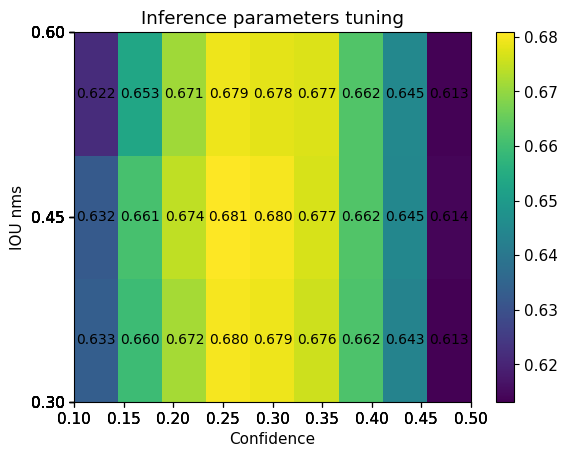

In [ ]:
%matplotlib inline
path_to_weigths = '../weigths/best_rgb_train.pt'
image_path = os.path.join(base_dir, 'dataset/19K53/19K53.tif')
gt_boxes_txt_path = os.path.join(base_dir, 'dataset/19K53/19K53_boxes.txt')
conf_thres_list = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
iou_nms_thres_list = [0.3, 0.45, 0.6]
hyperparameters_list, hyperparameters_metrics_dict = inference_parameters_tuning(path_to_weigths, image_path, gt_boxes_txt_path, conf_thres_list, iou_nms_thres_list,
                                                           infrared=False, crop_size=CROP_SIZE, step=STEP, preferred_metric='f1',
                                                           iou_eval_thres=0.4, plot=True)

Results of the tuning.
- Best values : `best_conf=0.25` and `best_iou_nms=0.45`.
- F1 score : $0.68$.
- Precision : $0.76$ ; Recall : $0.62$.
- MAP : $0.57$.

In [ ]:
best_conf = 0.25
best_iou_nms = 0.45

# Test
Let's now perform a training on the train + validation : we call this **full training**. This is our final model. *(The starting point of this training is still the fine-tuning on the pre-trained `yolov7_training.pt` weigths).*

We then test this final model on the test image. The inference is run using the bets inference parameters found before with the tuning.

### Full training

In [ ]:
%mkdir full_train
%cp -r train/images full_train/
%cp -r train/labels full_train/
%cp -r val/images full_train/
%cp -r val/labels full_train/

In [ ]:
# System RAM : ~8GB
# GPU RAM : 7GB
!python train.py --rgb_only --epochs 30 --workers 8 --device 0 --batch-size 8 --data 'data_fulltrain.yaml' --img 640 640 --cfg 'cfg/training/yolov7-tree.yaml' --weights 'yolov7_training.pt'

2023-10-09 08:23:00.499166: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 08:23:01.354508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 2023-10-9 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(rgb_only=True, weights='yolov7_training.pt', cfg='cfg/training/yolov7-tree.yaml', data='data_fulltrain.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=30, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok

### Inference

In [ ]:
path_to_weigths = '../weigths/best_rgb_fulltrain.pt'
image_path = os.path.join(base_dir, 'dataset/19K59/19K59.tif')
predict_on_img(path_to_weigths, image_path, output_bbs_path='./boxes.txt', infrared=False, crop_size=CROP_SIZE, step=STEP,
                   conf_thres=best_conf, iou_nms_thres=best_iou_nms, intersect_thres=0.75, verbose=True, save_fig_pred_bbs=True)

CROP IMAGE ...


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (98211778 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|██████████| 945/945 [00:09<00:00, 97.82it/s]


FINISH CROP IMAGE

RUN MODEL ON PATCHES ...
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



100%|██████████| 945/945 [01:05<00:00, 14.43it/s]


FINISH RUN MODEL ON PATCHES

UNIFY CROPS BBS ...


100%|██████████| 945/945 [00:00<00:00, 4042.28it/s]


Number of bbs after joining:, 41057
Number of bbs after NMS:, 11930
Number of bbs after enclosed bbs filtering:, 10889
FINISH UNIFY CROPS

SAVING IMAGE ...


100%|██████████| 10889/10889 [00:00<00:00, 55637.58it/s]


Image saved
FINISH SAVING IMAGE


### Evaluation

In [ ]:
image_path = os.path.join(base_dir, 'dataset/19K59/19K59_RGB.tif')
gt_boxes_txt_path = os.path.join(base_dir, 'dataset/19K59/19K59_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
visualize_errors_and_missings(image_path, gt_boxes_txt_path, pred_boxes_txt_path, iou_eval_thres=0.4, show=False)

100%|██████████| 8695/8695 [00:00<00:00, 103429.28it/s]


Figure saved


10889it [03:12, 56.66it/s]


mAP: 0.71
Last precision: 0.63
Last recall: 0.79
Last f1: 0.70
Best f1: 0.73; index: 8554


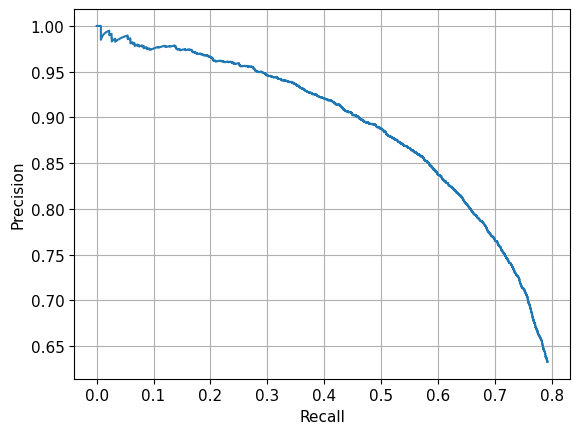

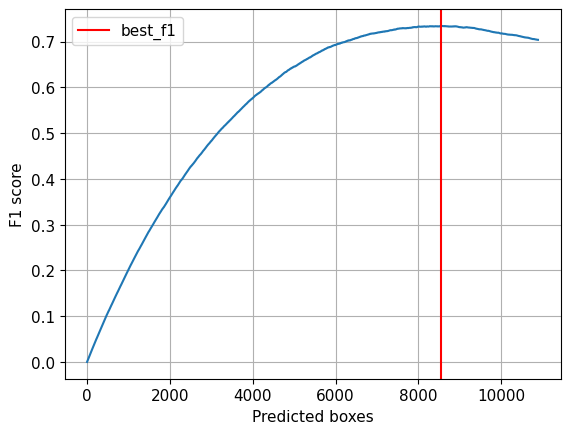

In [ ]:
%matplotlib inline
gt_boxes_txt_path = os.path.join(base_dir,'dataset/19K59/19K59_boxes.txt')
pred_boxes_txt_path = 'boxes.txt'
map_score, last_f1, last_prec, last_rec = evaluate_predicted_boxes(gt_boxes_txt_path, pred_boxes_txt_path,
                                                                   iou_eval_thres=0.4,
                                                                   plot_prec_rec=True, plot_f1=True, verbose=True)

Final test scores. 
- F1 score : $0.7$.
- Precision : $0.63$.
- Recall : $0.79$.
- MAP : $0.71$.